# 实验五：层次聚类
- 姓名：吴静
- 学号：2113285
- 班级：信息安全二班

## 实验要求

### 基本要求

绘制聚类前后样本分布情况：

- 实现single-linkage层次聚类算法
- 实现complete-linkage层次聚类算法

### 中级要求
实现average-linkage层次聚类算法，绘制样本分布图。

### 高级要求
对比上述三种算法，给出结论。

### 扩展要求
通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析。

### 导入需要的包

In [1]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

定义一些相关的函数

In [2]:
def to_float(data):
    for i in data:
        for j in range(len(i)):
            i[j]=float(i[j])

### 导入数据集

In [3]:
def get_data(name):
    f=open(name)
    data=f.readlines()
    x=[]
    for i in range(len(data)):
        temp=data[i].split(' ')
        x.append(temp)
        
    to_float(x)
    return x

存储数据和标签

In [4]:
data=[]
label=[]

data=get_data("data.dat")
label=get_data("label.dat")

### 实现聚类

- 计算欧几里得距离

In [5]:
def get_eucl_dis(point1,point2):
    add=0
    for i in range(len(point1)):
        add=add+(point1[i]-point2[i])**2
    dis=math.sqrt(add)
    return dis

存储每两个点之间的距离

In [6]:
def get_distance():
    ls=[ [] for i in range(len(data))]
    #每一列中也有很多元素，所以也要是列表
    for i in range(len(data)):
        for j in range(len(data)):
            if i>j:
                ls[i].append(get_eucl_dis(data[i],data[j]))
                # 使用下三角矩阵
            else:
                ls[i].append(float("inf"))
                # 为了后面求得最小值方便以及求得横纵坐标方便，这里不用的那些部分都要用inf（正无穷大）表示
    return ls

In [7]:
distance=[]
distance=get_distance()

### 实现 single-linkage 层次聚类算法
最短距离 / 单连接 (single linkage):类 Gp 的样本与 Gq 的样本之间的最短距离<br/>
$D_{pq} = min\{d_{ij}|x_i \in G_p, x_j \in G_q\}$

In [8]:
def single_linkage(data1,data2):
    #data1，data2分别为两个数据列表，其中存储的是数据的下标
    
    #min存储最小值，即最终要返回的值
    min=float("inf")
    
    #双层循环找到最小值
    for i in range(len(data1)):
        for j in range(len(data2)):
            temp=0
            #data1[i]和data2[j]分别表示两组数据下标
            #此时判断大小看需要从距离矩阵中哪里取值
            if data1[i]>data2[j]:
                temp=distance[data1[i]][data2[j]]
            else:
                temp=distance[data2[j]][data1[i]]
            
            if temp<min:
                min=temp
    return min

### 实现complete-linkage 层次聚类算法
最⻓距离 / 全连接 (complete linkage): 类 Gp 的样本与 Gq 样本之间的最⻓距离<br/>
$D_{pq} = max\{d_{ij}|x_i \in G_p, x_j \in G_q\}$

In [9]:
def complete_linkage(data1,data2):
    #data1，data2分别为两个数据列表，其中存储的是数据的下标
    
    #min存储最大值，即最终要返回的值
    max=float("-inf")
    
    #双层循环找到最大值
    for i in range(len(data1)):
        for j in range(len(data2)):
            temp=0
            #data1[i]和data2[j]分别表示两组数据下标
            #此时判断大小看需要从距离矩阵中哪里取值
            if data1[i]>data2[j]:
                temp=distance[data1[i]][data2[j]]
            else:
                temp=distance[data2[j]][data1[i]]
            
            if temp>max:
                max=temp
    return max

### 实现 average-linkage 层次聚类算法
平均距离 (average linkage): 类 Gp 与 Gq 任意两个样本之间距离的平均值<br/>
$D_{pq} = \frac{1}{n_pn_q}\sum_{x_i \in G_p}\sum_{x_j \in G_q} d_{ij}$

In [10]:
def average_linkage(data1,data2):
    #data1，data2分别为两个数据列表，其中存储的是数据的下标
    
    #存储的是距离和
    dis_pq=0.0
    
    #双层循环计算距离和
    for i in range(len(data1)):
        for j in range(len(data2)):
            temp=0.0
            #data1[i]和data2[j]分别表示两组数据下标
            #此时判断大小看需要从距离矩阵中哪里取值
            if data1[i]>data2[j]:
                temp=distance[data1[i]][data2[j]]
            else:
                temp=distance[data2[j]][data1[i]]
            
            dis_pq=dis_pq+temp
            
    return dis_pq/(len(data1)*len(data2))

### 进行层次聚类

部分用到的知识点：

1. 关于深拷贝和浅拷贝的区别
- deepcopy是深拷贝，即使列表中的元素是可变类型也不会被影响；
- 直接使用distance\[:\]的话，在对copy进行操作的同时，会影响distance

2. 用到的函数：
`numpy.argmin(a, axis=None, out=None)`

- `a`是要查找最小值的数组。
- `axis`是可选参数，用于指定沿着哪个轴查找最小值。如果未指定，则将数组扁平化并查找整个数组中的最小值索引。
- `out`也是可选参数，用于指定结果存放的位置。

3. 两种除法运算
- `/`进行的是普通的除法运算，它返回浮点数结果。
- `//`执行的是地板除法运算，它返回不大于真实结果的最大整数值。

4. 列表之间的连接
- 列表之间相加可以使用“+”或者extend函数，append函数是在列表之后增加元素

5. ***聚类实现方法：***
- 首先进行初始化：
    - 进行一个distance的深拷贝
    - 创建一个列表category存储每一类的原数据列表的下标
    - category初始化时每一个子类型都是一个列表而不能是一个数，因为后续还要增加其他的数据下标
- 进行循环，当category分类总数大于需要分的类别数，则继续循环
- 首先计算出矩阵中最小值的下标
- 得到最小值下标对应的横纵坐标
- 更新复制后的距离矩阵：将大坐标对应的横纵行列删除
- 更新category：将两者合并（连接）
- 进行层次聚类：
    - single_linkage
    - complete_linkage
    - average_linkage

In [11]:
def clustering(func,num):
    category=[]
    copy_dis=copy.deepcopy(distance)
    filname=''
    epoch=0
    
    for i in range(len(data)):
        #temp存储每个类别对应的数据的下标集合
        #刚开始初始化时，每一个数据都是一个类别
        temp=[]
        temp.append(i)
        category.append(temp)
        #用一个列表category存储类别
    
    while len(category)>num:
        #当分类还没结束，继续聚类

        #将距离矩阵转化为np矩阵，便于通过函数找到最小值
        dis=np.array(copy_dis)

        #min_position为扁平化后的最小值的下标
        min_position=dis.argmin()

        #row_data为每一行的元素数量，方便后文求横纵坐标
        row_data=len(copy_dis[0])

        #找到下标对应的横纵坐标
        row=min_position//row_data
        col=min_position%row_data

        #合并类别：新类别数据集合为两个旧类别数据集合的连接
        #由于使用的下三角矩阵，所以横坐标一定比纵坐标大
        #找到大坐标的对应的数据列表，并删除
        temp=category.pop(row)
        #合并两个数据列表
        temp.extend(category[col])
        #更新小的那个类别的数据列表
        category[col]=temp

        #更新距离矩阵
         
        #删除row对应那一行
        copy_dis.pop(row)

        #删除row对应那一列
        for i in range(len(copy_dis)):
            copy_dis[i].pop(row)
                
        if func=="single_linkage":
            #更新距离
            #对于该距离矩阵，比col小的那一部分需要更新的值在[col][i]
            for i in range(0,col-1):
                copy_dis[col][i]=single_linkage(category[col],category[i])

            #比col大的那一部分需要更新的值在[i][col]
            for i in range(col+1,len(copy_dis)):
                copy_dis[i][col]=single_linkage(category[col],category[i])
                
            filename="single_linkage.csv"
            
        if func=="complete_linkage":
            #更新距离
            #对于该距离矩阵，比col小的那一部分需要更新的值在[col][i]
            for i in range(0,col-1):
                copy_dis[col][i]=complete_linkage(category[col],category[i])

            #比col大的那一部分需要更新的值在[i][col]
            for i in range(col+1,len(copy_dis)):
                copy_dis[i][col]=complete_linkage(category[col],category[i])
                
            filename="complete_linkage.csv"
            
        if func=="average_linkage":
            #更新距离
            #对于该距离矩阵，比col小的那一部分需要更新的值在[col][i]
            for i in range(0,col-1):
                copy_dis[col][i]=average_linkage(category[col],category[i])

            #比col大的那一部分需要更新的值在[i][col]
            for i in range(col+1,len(copy_dis)):
                copy_dis[i][col]=average_linkage(category[col],category[i])
    
            filename="average_linkage.csv"
        
        epoch+=1
        str_write=str(epoch)+":"+str(category)+"\n"
        with open(filename,'a') as file:
            file.write(str_write)
    
    str_write1="\n"
    for i in range(len(category)):
        str_write1+=str(len(category[i]))+' '
    
    print(str_write1)
    
    with open(filename,'a') as file:
        file.write(str_write1)
        
    return category

对num∈\[2.5\]做聚类

In [12]:
result1=clustering("single_linkage",2)


1000 1000 


In [13]:
result2=clustering("complete_linkage",2)


1000 1000 


In [14]:
result3=clustering("average_linkage",2)


1000 1000 


In [15]:
result4=clustering("single_linkage",3)


1000 999 1 


In [16]:
result5=clustering("complete_linkage",3)


508 1000 492 


In [17]:
result6=clustering("average_linkage",3)


500 1000 500 


In [18]:
result7=clustering("single_linkage",4)


1000 998 1 1 


In [19]:
result8=clustering("complete_linkage",4)


508 499 492 501 


In [20]:
result9=clustering("average_linkage",4)


500 496 500 504 


In [21]:
result10=clustering("single_linkage",5)


1000 997 1 1 1 


In [22]:
result11=clustering("complete_linkage",5)


411 499 492 501 97 


In [23]:
result12=clustering("average_linkage",5)


500 494 500 504 2 


### 可视化数据
将分好的类以散点图的形式画出

In [24]:
def print_dot(result):
    #画出散点图
    #分出三类数据的横纵坐标，然后用不同颜色画出
    
    #len(result)表示有几类数据
    x=[ [] for i in range(len(result))]
    y=[ [] for i in range(len(result))]
    z=[ [] for i in range(len(result))]
    
    #进行数据的存储
    for i in range(len(result)):
        #对第i类数据进行存储
        for j in range(len(result[i])):
            #i类数据总共有几个
            
            #result[i][j]表示第i类的第j个数据的下标
            #0，1，2分别表示数据的第一个第二个和第三个元素
            x[i].append(data[result[i][j]][0])
            y[i].append(data[result[i][j]][1])
            z[i].append(data[result[i][j]][2])
            
    # 创建图形和三维坐标系
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    
    colors=["#CF6862","#577149","#688BD5","#000000","#FDD883"]
    for i in range(len(result)):
        ax.scatter(x[i], y[i], z[i], c=colors[i], marker='o',s=np.pi)  

#### 对single_linkage在num∈\[2.5\]的可视化结果

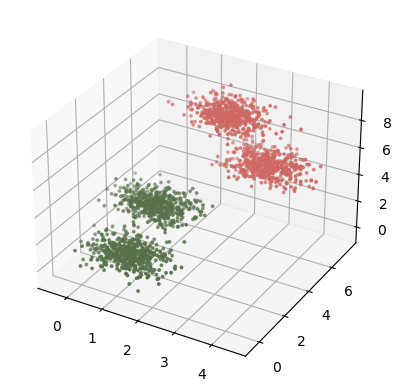

In [25]:
print_dot(result1)

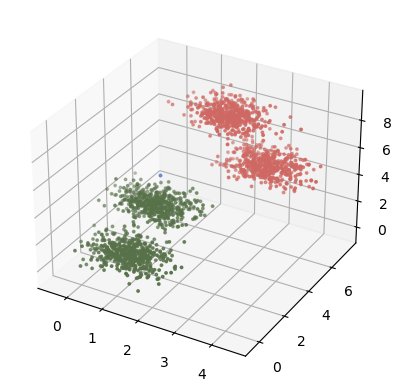

In [26]:
print_dot(result4)

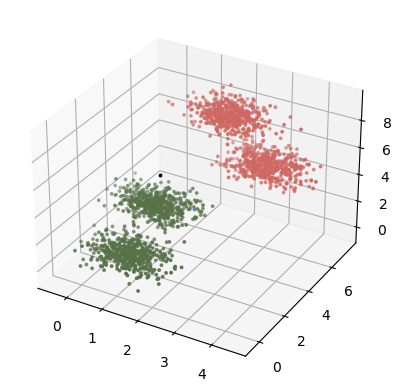

In [27]:
print_dot(result7)

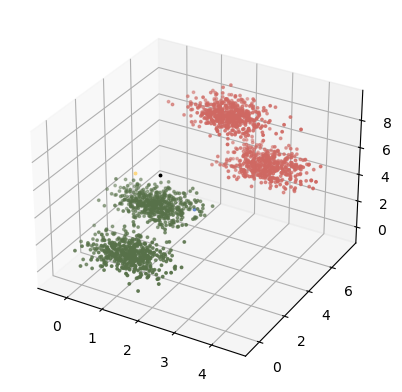

In [28]:
print_dot(result10)

对于single_linkage，分类数为2即可

#### 对complete_linkage在num∈\[2.5\]的可视化结果

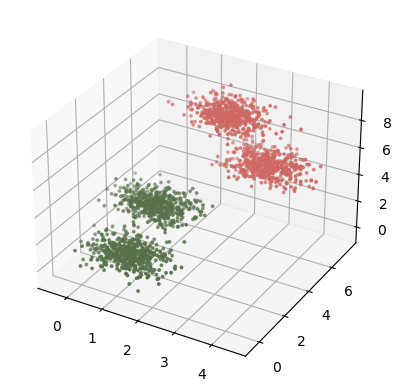

In [29]:
print_dot(result2)

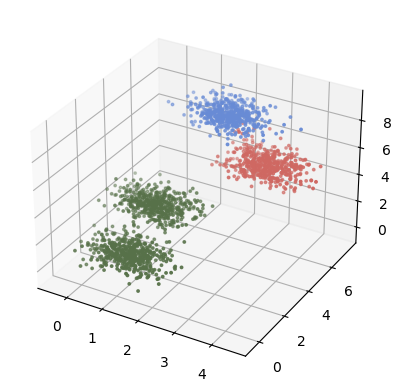

In [30]:
print_dot(result5)

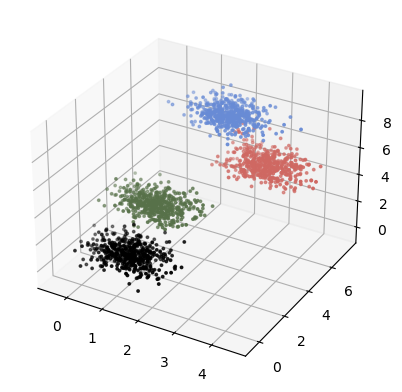

In [31]:
print_dot(result8)

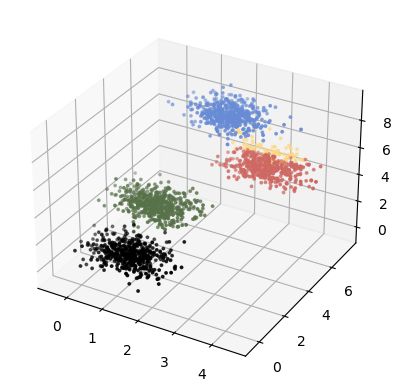

In [32]:
print_dot(result11)

对于complete_linkage，分类数为4或5均可

#### 对average_linkage在num∈\[2.5\]的可视化结果

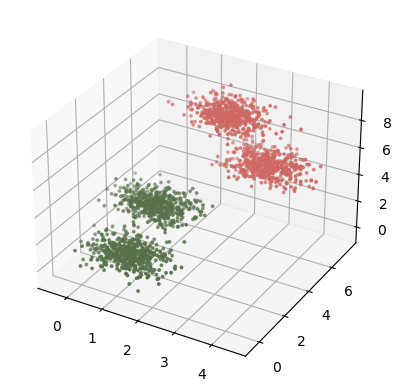

In [34]:
print_dot(result3)

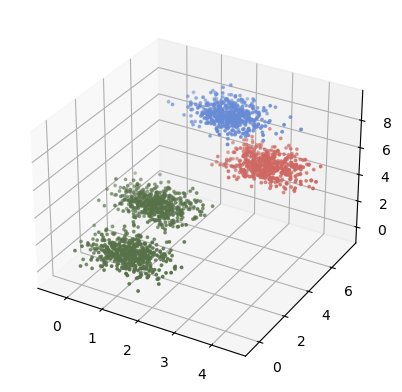

In [35]:
print_dot(result6)

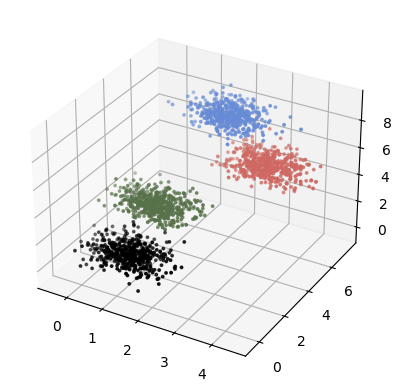

In [36]:
print_dot(result9)

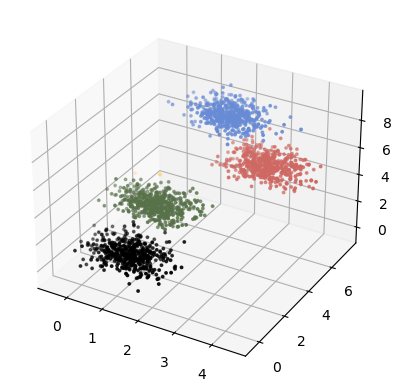

In [37]:
print_dot(result12)

可以看到，对于average_linkage，分类数为4是最佳的

### 实验结果对比分析
通过上述实验，我们可以明显的看出，使用average-linkage算法的实验结果明显优于使用signle-linkage和complete-linkage算法的实验结果。他对于数据的分类结果更加清晰。
- SingleLinkage容易造成两个聚类明明从“大局”上离得比较远，但是由于其中个别的点距离比较近就被合并了，并且这样合并之后这种情况会进一步扩大，最后会得到比较松散的聚类，于是我们可以看到，SingleLinkage只讲数据集分成了两个大类别。
- CompleteLinkage会导致两个类别即使已经很接近了，但是只要有不配合的点存在，就不会合并，这一点在num=5的时候看的比较清楚。
- average-linkage把两个集合中的点两两的距离全部放在一起求一个平均值，相对也能得到合适一点的结果。考虑了整体情况，不会因为某些极端值或边界上的点影响整体结果。而另外两种方法就只考虑了两个集合中的部分点

### 性能分析
从原理来看，SingleLinkage和CompleteLinkage都只需要查找原距离矩阵两个类别的最小值或者最大值，使用了一个双层循环；

average-linkage则是在遍历的基础上将所有遍历得到的结果相加，最后除以两个类别的数量积；

这三种方法都涉及一个双层循环遍历，所以性能方面应该差不多，不同的是一个是比较，一个是四则运算。